In [1]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install lxml

Note: you may need to restart the kernel to use updated packages.


In [3]:
from bs4 import BeautifulSoup
import requests

In [4]:


import requests
from bs4 import BeautifulSoup

# URL and headers
job_url = "https://www.linkedin.com/jobs/search?keywords=&location=India&geoId=102713980&trk=public_jobs_jobs-search-bar_search-submit&position=1&pageNum=0"
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36'
}

# Fetch the page
job_response = requests.get(job_url, headers=headers)
soup = BeautifulSoup(job_response.text, "html.parser")

# Find all job cards
job_cards = soup.find_all("div", {"class": "base-card"})

# Loop through each card and extract info
for job in job_cards:
    # Job ID
    job_id = job.get("data-entity-urn")
    if job_id:
        job_id = job_id.split(":")[-1]
    else:
        job_id = "N/A"
        
    # Job Title
    title_elem = job.find("h3", {"class": "base-search-card__title"})
    job_title = title_elem.text.strip() if title_elem else "N/A"
    
   # Extract Company Name
    company_elem = job.find('h4', class_='base-search-card__subtitle')
    company_name = company_elem.get_text(strip=True) if company_elem else 'No Company Found'

    
    # Location
    location_elem = job.find("span", {"class": "job-search-card__location"})
    location = location_elem.text.strip() if location_elem else "N/A"
    
    # Print the result
    print(f"Job ID: {job_id}")
    print(f"Title: {job_title}")
    print(f"Company: {company_name}")
    print(f"Location: {location}")
    print("="*40)


Job ID: 4226790347
Title: Logistics & Customer Service Officer
Company: Britannia Industries Limited
Location: Jaipur, Rajasthan, India
Job ID: 4226792217
Title: Area Sales Executive
Company: Britannia Industries Limited
Location: Firozabad, Uttar Pradesh, India
Job ID: 4226137179
Title: Area Business Manager, North East
Company: Aditya Birla Fashion and Retail Ltd.
Location: Assam, India
Job ID: 4226302962
Title: Area Sales Executive
Company: Britannia Industries Limited
Location: Pattan, Jammu & Kashmir, India
Job ID: 4227006496
Title: Marketing Manager
Company: Meril
Location: Mumbai, Maharashtra, India
Job ID: 4224665033
Title: Administrative Business Partner
Company: Google
Location: Bengaluru, Karnataka, India
Job ID: 4226674602
Title: Dainik Bhaskar - Product Manager - SalesForce Automation
Company: Dainik Bhaskar
Location: Bhopal, Madhya Pradesh, India
Job ID: 4227024111
Title: Area Manager - Pune
Company: Aditya Birla Capital
Location: Maharashtra, India
Job ID: 4225183184
Tit

In [5]:
import csv

# Open CSV file
with open('linkedin_jobs.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Job ID', 'Job Title', 'Company', 'Location'])  # CSV headers

    for job in job_cards:
        job_id_attr = job.get("data-entity-urn")
        job_id = job_id_attr.split(":")[-1] if job_id_attr else 'No ID Found'

        title_elem = job.find('h3', class_='base-search-card__title')
        job_title = title_elem.get_text(strip=True) if title_elem else 'No Title Found'

        company_elem = job.find('h4', class_='base-search-card__subtitle')
        company_name = company_elem.get_text(strip=True) if company_elem else 'No Company Found'

        location_elem = job.find('span', class_='job-search-card__location')
        job_location = location_elem.get_text(strip=True) if location_elem else 'No Location Found'

        # Write to CSV
        writer.writerow([job_id, job_title, company_name, job_location])

In [6]:
import pandas as pd

In [7]:
df=pd.read_csv("linkedinjobstitle.csv")

In [8]:
import pandas as pd
import csv
from io import StringIO

data = '''
Job ID,Job Title,Company,Location
4226790347,Logistics & Customer Service Officer,Britannia Industries Limited,"Jaipur, Rajasthan, India"
4224657820,Administrative Business Partner,Google,"Gurgaon, Haryana, India"
4226792217,Area Sales Executive,Britannia Industries Limited,"Firozabad, Uttar Pradesh, India"
4226137179,"Area Business Manager, North East",Aditya Birla Fashion and Retail Ltd.,"Assam, India"
4226302962,Area Sales Executive,Britannia Industries Limited,"Pattan, Jammu & Kashmir, India"
4224665033,Administrative Business Partner,Google,"Bengaluru, Karnataka, India"
4227006496,Marketing Manager,Meril,"Mumbai, Maharashtra, India"
4226674602,Dainik Bhaskar - Product Manager - SalesForce Automation,Dainik Bhaskar,"Bhopal, Madhya Pradesh, India"
4227024111,Area Manager - Pune,Aditya Birla Capital,"Maharashtra, India"
4226125110,Senior Executive- Talent Acquisition,KPMG India,"Bengaluru, Karnataka, India"
4226135648,SENIOR MANAGER - HR,Emami Ltd,"Rudrapur, Uttarakhand, India"
4225910443,"Manager, Country Operation (India, Chennai)",Teleport,"Chennai, Tamil Nadu, India"
4227072200,Area Sales Manager,Godrej Consumer Products Limited,"Uttar Pradesh, India"
4226133537,Support Time Office,Aditya Birla Group,"Gujarat, India"
4227066852,Area Sales Manager,Godrej Consumer Products Limited,"Patna, Bihar, India"
4225949928,Junior Buyer,House of Anita Dongre Limited,"Navi Mumbai, Maharashtra, India"
4225078044,Officer / Executive â€“ Regulatory Affairs,Meril,"Vapi, Gujarat, India"
4226134347,Relationship Manager - Tile/ Bath ware,Aditya Birla Group,"Gujarat, India"
4226135284,Associate Relationship Manager - Tile/Bath ware,Aditya Birla Group,"Madhya Pradesh, India"
4227066337,Executive Assistant,Unacademy,"Bangalore Urban, Karnataka, India"
4226643474,Business Analyst,Uber,"Hyderabad, Telangana, India"
4225975257,Business Analyst,Vedantu,"Bengaluru, Karnataka, India"
4227063223,Contract Management Specialist,Tata Communications Transformation Services (TCTS),"Pune, Maharashtra, India"
4227025000,Support Civil Maintenance,Aditya Birla Group,"Uttar Pradesh, India"
4226143912,Zonal Manager - Delhi,MakeMyTrip,"Delhi, India"
4225967568,Industrial Relations Manager,Air India SATS Airport Services Private Limited (AISATS),"Trivandrum, Kerala, India"
4224664174,Product Manager,Google,"Bengaluru, Karnataka, India"
4226134351,Credit Analyst,Aditya Birla Group,"Karnataka, India"
4225516223,"Business Analyst, Amazon Fresh Category Team",Amazon,"Bengaluru, Karnataka, India"
4226604886,Area Sales Executive,Britannia Industries Limited,"Solapur, Maharashtra, India"
4224653847,"Digital Marketing Strategist, gTech",Google,"Gurgaon, Haryana, India"
4226138108,Associate Relationship Manager - ply,Aditya Birla Group,"Madhya Pradesh, India"
4224749362,Assistant Manager,UltraTech Cement,"Maharashtra, India"
4224664140,Account Manager,Google,"Bengaluru, Karnataka, India"
4226130931,Relationship Manager - Tile/ Bath ware,Aditya Birla Group,"Maharashtra, India"
4227057464,Executive - Accounts receivable (AR),PhonePe,"Bengaluru, Karnataka, India"
4227173423,Trainee- Security,GMR Hyderabad International Airport Ltd,Greater Hyderabad Area
4227425211,Software Engineer I,Uber,"Bengaluru, Karnataka, India"
4226138105,Associate Relationship Manager - Tile/Bath ware,Aditya Birla Group,"Karnataka, India"
4227090636,Group Product Manager,Britannia Industries Limited,"Bengaluru, Karnataka, India"
4226394397,Content Executive,Unilever,"Mumbai, Maharashtra, India"
4226192942,Executive Assistant,JPMorganChase,"Bengaluru, Karnataka, India"
4224753381,Officer,UltraTech Cement,"Maharashtra, India"
4227058275,HR Ops Coordinator (11 months FTC),LinkedIn,"Bengaluru, Karnataka, India"
4224748765,Deputy General Manager,UltraTech Cement,"Bengaluru, Karnataka, India"
4226192061,"Manager, Data Analytics (Data, Analytics and AI consultant) [T500-17839]",McDonald's,"Hyderabad, Telangana, India"
4224723878,Senior Officer,UltraTech Cement,"Noida, Uttar Pradesh, India"
4226134346,Associate Relationship Manager - Tile/Bath ware,Aditya Birla Group,"Karnataka, India"
4225527933,Chat Support Associate - Logistics,Laundryheap,"Bengaluru, Karnataka, India"
4224664203,"Territory Manager, Google Workspace New Business",Google,"Gurugram, Haryana, India"
4226180823,"Manager, Data Analytics (Reporting & Business Intelligence) [T500-17837]",McDonald's,"Hyderabad, Telangana, India"
4225998693,"Accountant 1, Global Intercompany",Johnson & Johnson,"Bengaluru, Karnataka, India"
4224658924,Program Manager,Google,"Gurugram, Haryana, India"
4224747712,Manager,UltraTech Cement,"Bengaluru, Karnataka, India"
4227171529,Trainee- Security,GMR Hyderabad International Airport Ltd,Greater Hyderabad Area
4227170518,Trainee- Security,GMR Hyderabad International Airport Ltd,Greater Hyderabad Area
4227171528,Trainee- Security,GMR Hyderabad International Airport Ltd,Greater Hyderabad Area
4226131827,Associate Relationship Manager - TMT,Aditya Birla Group,"Karnataka, India"
4226136180,Manager - Strategy,Aditya Birla Group,"Karnataka, India"
4225991606,"Director, HR Service Delivery & Ops [T500-17823]",McDonald's,"Hyderabad, Telangana, India"

'''

# Use StringIO to treat string as file
csv_data = StringIO(data)

# Use pandas to read it
df = pd.read_csv(csv_data)

print(df)

        Job ID                                          Job Title  \
0   4226790347               Logistics & Customer Service Officer   
1   4224657820                    Administrative Business Partner   
2   4226792217                               Area Sales Executive   
3   4226137179                  Area Business Manager, North East   
4   4226302962                               Area Sales Executive   
5   4224665033                    Administrative Business Partner   
6   4227006496                                  Marketing Manager   
7   4226674602  Dainik Bhaskar - Product Manager - SalesForce ...   
8   4227024111                                Area Manager - Pune   
9   4226125110               Senior Executive- Talent Acquisition   
10  4226135648                                SENIOR MANAGER - HR   
11  4225910443        Manager, Country Operation (India, Chennai)   
12  4227072200                                 Area Sales Manager   
13  4226133537                    

In [9]:
# Split the location into City, State, Country
df[['City', 'State', 'Country']] = df['Location'].str.split(',', expand=True)

# Clean whitespace
df['City'] = df['City'].str.strip()
df['State'] = df['State'].str.strip()
df['Country'] = df['Country'].str.strip()

print(df[['Location', 'City', 'State', 'Country']].head())

                          Location       City            State Country
0         Jaipur, Rajasthan, India     Jaipur        Rajasthan   India
1          Gurgaon, Haryana, India    Gurgaon          Haryana   India
2  Firozabad, Uttar Pradesh, India  Firozabad    Uttar Pradesh   India
3                     Assam, India      Assam            India    None
4   Pattan, Jammu & Kashmir, India     Pattan  Jammu & Kashmir   India


In [10]:
df['City'] = df['City'].replace({
    'Bangalore Urban': 'Bengaluru',
    'Bangalore Rural': 'Bengaluru',
    'Bengaluru East':'Bengaluru',
    'Greater Bengaluru Area': 'Bengaluru',
    'Gurgaon': 'Gurugram'
})

In [11]:
df.head()

,Job ID,Job Title,Company,Location,City,State,Country
0,4226790347,Logistics & Customer Service Officer,Britannia Industries Limited,"Jaipur, Rajasthan, India",Jaipur,Rajasthan,India
1,4224657820,Administrative Business Partner,Google,"Gurgaon, Haryana, India",Gurugram,Haryana,India
2,4226792217,Area Sales Executive,Britannia Industries Limited,"Firozabad, Uttar Pradesh, India",Firozabad,Uttar Pradesh,India
3,4226137179,"Area Business Manager, North East",Aditya Birla Fashion and Retail Ltd.,"Assam, India",Assam,India,None
4,4226302962,Area Sales Executive,Britannia Industries Limited,"Pattan, Jammu & Kashmir, India",Pattan,Jammu & Kashmir,India


In [12]:
print(df.isnull().sum())

Job ID        0
Job Title     0
Company       0
Location      0
City          0
State         4
Country      21
dtype: int64


In [13]:
df['Country'] = df['Country'].fillna('India')

In [14]:
df['City'] = df['City'].str.replace('India', '', regex=False).str.strip()

In [15]:
print(df[df.isnull().any(axis=1)])

        Job ID          Job Title                                  Company  \
36  4227173423  Trainee- Security  GMR Hyderabad International Airport Ltd   
54  4227171529  Trainee- Security  GMR Hyderabad International Airport Ltd   
55  4227170518  Trainee- Security  GMR Hyderabad International Airport Ltd   
56  4227171528  Trainee- Security  GMR Hyderabad International Airport Ltd   

                  Location                    City State Country  
36  Greater Hyderabad Area  Greater Hyderabad Area  None   India  
54  Greater Hyderabad Area  Greater Hyderabad Area  None   India  
55  Greater Hyderabad Area  Greater Hyderabad Area  None   India  
56  Greater Hyderabad Area  Greater Hyderabad Area  None   India  


In [16]:
df['State'] = df['State'].fillna('Telangana')

In [17]:
print(df[df.isnull().any(axis=1)])

Empty DataFrame
Columns: [Job ID, Job Title, Company, Location, City, State, Country]
Index: []


In [18]:
df.shape

(60, 7)

In [19]:
null_count = df['State'].isnull().sum()
print(f"Number of null values in 'State' column: {null_count}")

Number of null values in 'State' column: 0


In [20]:
df['City'] = df['City'].replace({
    'Mumbai Metropolitan Region': 'Mumbai',
    'Greater Hyderabad Area':'Hyderabad',
   
})

In [21]:
null_rows = df[df['State'].isnull()]
print(null_rows)

Empty DataFrame
Columns: [Job ID, Job Title, Company, Location, City, State, Country]
Index: []


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Job ID     60 non-null     int64 
 1   Job Title  60 non-null     object
 2   Company    60 non-null     object
 3   Location   60 non-null     object
 4   City       60 non-null     object
 5   State      60 non-null     object
 6   Country    60 non-null     object
dtypes: int64(1), object(6)
memory usage: 3.4+ KB


In [23]:
df.head()

,Job ID,Job Title,Company,Location,City,State,Country
0,4226790347,Logistics & Customer Service Officer,Britannia Industries Limited,"Jaipur, Rajasthan, India",Jaipur,Rajasthan,India
1,4224657820,Administrative Business Partner,Google,"Gurgaon, Haryana, India",Gurugram,Haryana,India
2,4226792217,Area Sales Executive,Britannia Industries Limited,"Firozabad, Uttar Pradesh, India",Firozabad,Uttar Pradesh,India
3,4226137179,"Area Business Manager, North East",Aditya Birla Fashion and Retail Ltd.,"Assam, India",Assam,India,India
4,4226302962,Area Sales Executive,Britannia Industries Limited,"Pattan, Jammu & Kashmir, India",Pattan,Jammu & Kashmir,India


In [24]:
df.tail()

,Job ID,Job Title,Company,Location,City,State,Country
55,4227170518,Trainee- Security,GMR Hyderabad International Airport Ltd,Greater Hyderabad Area,Hyderabad,Telangana,India
56,4227171528,Trainee- Security,GMR Hyderabad International Airport Ltd,Greater Hyderabad Area,Hyderabad,Telangana,India
57,4226131827,Associate Relationship Manager - TMT,Aditya Birla Group,"Karnataka, India",Karnataka,India,India
58,4226136180,Manager - Strategy,Aditya Birla Group,"Karnataka, India",Karnataka,India,India
59,4225991606,"Director, HR Service Delivery & Ops [T500-17823]",McDonald's,"Hyderabad, Telangana, India",Hyderabad,Telangana,India


In [52]:
df.loc[df['City'] == 'Assam', 'State'] = 'Assam'

In [54]:
df.loc[df['City'] == 'Karnataka', 'State'] = 'Karnataka'

In [56]:
df.tail()

,Job ID,Job Title,Company,Location,City,State,Country
55,4227170518,Trainee- Security,GMR Hyderabad International Airport Ltd,Greater Hyderabad Area,Hyderabad,Telangana,India
56,4227171528,Trainee- Security,GMR Hyderabad International Airport Ltd,Greater Hyderabad Area,Hyderabad,Telangana,India
57,4226131827,Associate Relationship Manager - TMT,Aditya Birla Group,"Karnataka, India",Karnataka,Karnataka,India
58,4226136180,Manager - Strategy,Aditya Birla Group,"Karnataka, India",Karnataka,Karnataka,India
59,4225991606,"Director, HR Service Delivery & Ops [T500-17823]",McDonald's,"Hyderabad, Telangana, India",Hyderabad,Telangana,India


In [58]:
unique_cities = df['City'].unique()

print(unique_cities)

['Jaipur' 'Gurugram' 'Firozabad' 'Assam' 'Pattan' 'Bengaluru' 'Mumbai'
 'Bhopal' 'Maharashtra' 'Rudrapur' 'Chennai' 'Uttar Pradesh' 'Gujarat'
 'Patna' 'Navi Mumbai' 'Vapi' 'Madhya Pradesh' 'Hyderabad' 'Pune' 'Delhi'
 'Trivandrum' 'Karnataka' 'Solapur' 'Noida']


In [80]:
df = df.rename(columns={'Job Title': 'Skills'})

In [60]:
# List of state names to exclude
states = ['Assam', 'Maharashtra', 'Uttar Pradesh', 'Gujarat', 
          'Madhya Pradesh', 'Karnataka']

# Get unique cities
unique_cities = df['City'].unique()

# Filter: keep only items that are NOT in the states list
clean_cities = [City for City in unique_cities if City not in states]

print(clean_cities)

['Jaipur', 'Gurugram', 'Firozabad', 'Pattan', 'Bengaluru', 'Mumbai', 'Bhopal', 'Rudrapur', 'Chennai', 'Patna', 'Navi Mumbai', 'Vapi', 'Hyderabad', 'Pune', 'Delhi', 'Trivandrum', 'Solapur', 'Noida']


In [62]:
df['City'].unique()

array(['Jaipur', 'Gurugram', 'Firozabad', 'Assam', 'Pattan', 'Bengaluru',
       'Mumbai', 'Bhopal', 'Maharashtra', 'Rudrapur', 'Chennai',
       'Uttar Pradesh', 'Gujarat', 'Patna', 'Navi Mumbai', 'Vapi',
       'Madhya Pradesh', 'Hyderabad', 'Pune', 'Delhi', 'Trivandrum',
       'Karnataka', 'Solapur', 'Noida'], dtype=object)

In [66]:
df = df[df['City'].isin(clean_cities)]

In [68]:
df.head()

,Job ID,Job Title,Company,Location,City,State,Country
0,4226790347,Logistics & Customer Service Officer,Britannia Industries Limited,"Jaipur, Rajasthan, India",Jaipur,Rajasthan,India
1,4224657820,Administrative Business Partner,Google,"Gurgaon, Haryana, India",Gurugram,Haryana,India
2,4226792217,Area Sales Executive,Britannia Industries Limited,"Firozabad, Uttar Pradesh, India",Firozabad,Uttar Pradesh,India
4,4226302962,Area Sales Executive,Britannia Industries Limited,"Pattan, Jammu & Kashmir, India",Pattan,Jammu & Kashmir,India
5,4224665033,Administrative Business Partner,Google,"Bengaluru, Karnataka, India",Bengaluru,Karnataka,India


In [70]:
df['City'].unique()

array(['Jaipur', 'Gurugram', 'Firozabad', 'Pattan', 'Bengaluru', 'Mumbai',
       'Bhopal', 'Rudrapur', 'Chennai', 'Patna', 'Navi Mumbai', 'Vapi',
       'Hyderabad', 'Pune', 'Delhi', 'Trivandrum', 'Solapur', 'Noida'],
      dtype=object)

In [72]:
df.tail()

,Job ID,Job Title,Company,Location,City,State,Country
53,4224747712,Manager,UltraTech Cement,"Bengaluru, Karnataka, India",Bengaluru,Karnataka,India
54,4227171529,Trainee- Security,GMR Hyderabad International Airport Ltd,Greater Hyderabad Area,Hyderabad,Telangana,India
55,4227170518,Trainee- Security,GMR Hyderabad International Airport Ltd,Greater Hyderabad Area,Hyderabad,Telangana,India
56,4227171528,Trainee- Security,GMR Hyderabad International Airport Ltd,Greater Hyderabad Area,Hyderabad,Telangana,India
59,4225991606,"Director, HR Service Delivery & Ops [T500-17823]",McDonald's,"Hyderabad, Telangana, India",Hyderabad,Telangana,India


In [78]:
df['State'].unique()

array(['Rajasthan', 'Haryana', 'Uttar Pradesh', 'Jammu & Kashmir',
       'Karnataka', 'Maharashtra', 'Madhya Pradesh', 'Uttarakhand',
       'Tamil Nadu', 'Bihar', 'Gujarat', 'Telangana', 'India', 'Kerala'],
      dtype=object)

In [82]:
skill_counts = df.groupby(['City', 'Skills']).size().reset_index(name='Count')

In [84]:
Top_skills = (
    df['Skills']
    .value_counts()
    .head(10)
    .index
)

# Filter only these top 10 skills
Filtered = skill_counts[skill_counts['Skills'].isin(Top_skills)]

In [86]:
Heatmap_data = Filtered.pivot(index='Skills', columns='City', values='Count').fillna(0)

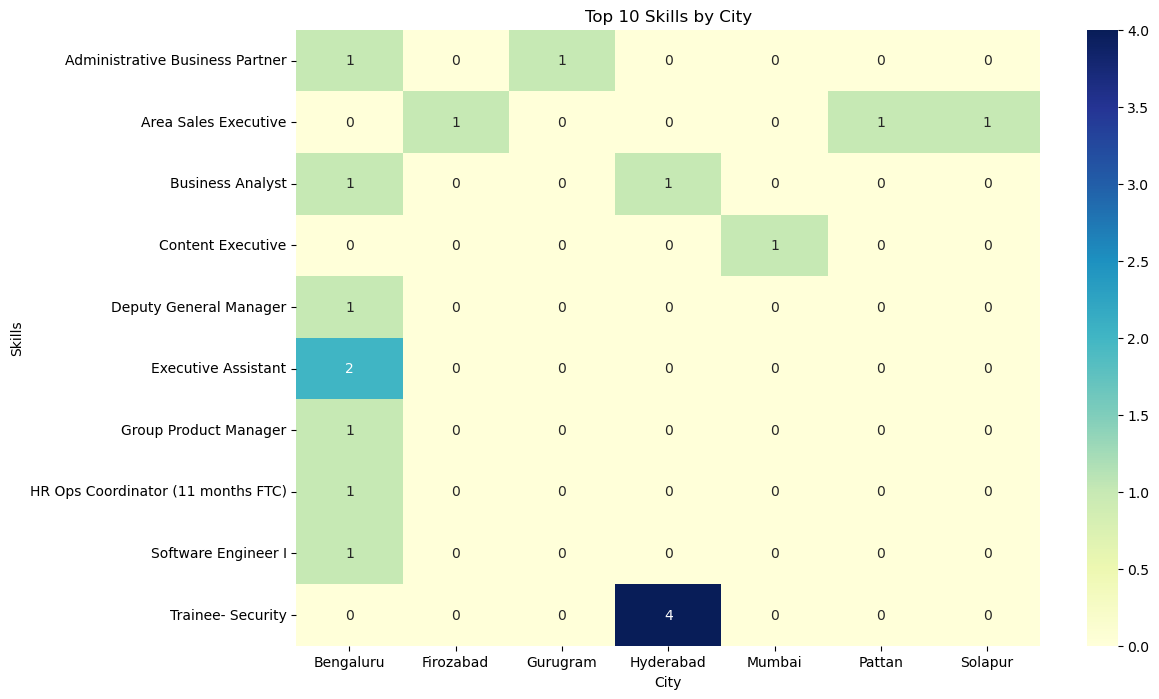

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(Heatmap_data, annot=True, fmt='g', cmap='YlGnBu')

plt.title('Top 10 Skills by City')
plt.xlabel('City')
plt.ylabel('Skills')
plt.show()

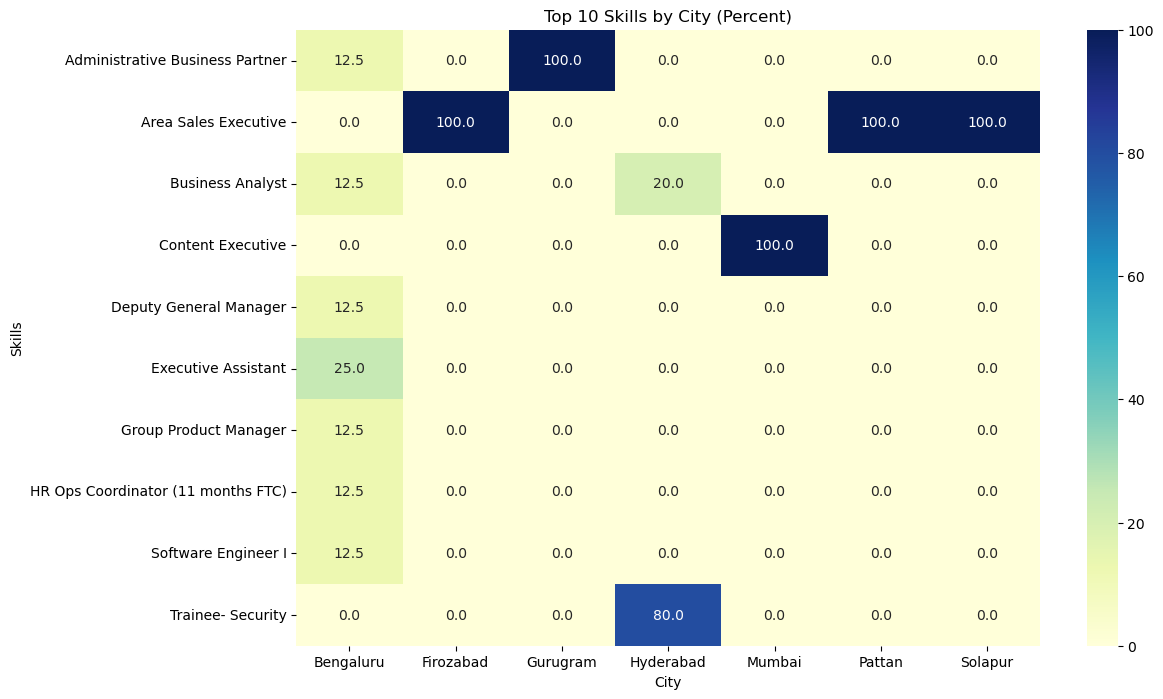

In [100]:
# Get top 10 skills
Top_skills = df['Skills'].value_counts().head(10).index

# Filter and make a copy to avoid SettingWithCopyWarning
Filtered = skill_counts[skill_counts['Skills'].isin(Top_skills)].copy()

# Add percentage safely
Filtered['Percent'] = Filtered['Count'] / Filtered.groupby('City')['Count'].transform('sum') * 100

# Pivot table
Heatmap_data = Filtered.pivot(index='Skills', columns='City', values='Percent').fillna(0)

# Plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(Heatmap_data, annot=True, fmt='.1f', cmap='YlGnBu')

plt.title('Top 10 Skills by City (Percent)')
plt.xlabel('City')
plt.ylabel('Skills')
plt.show()

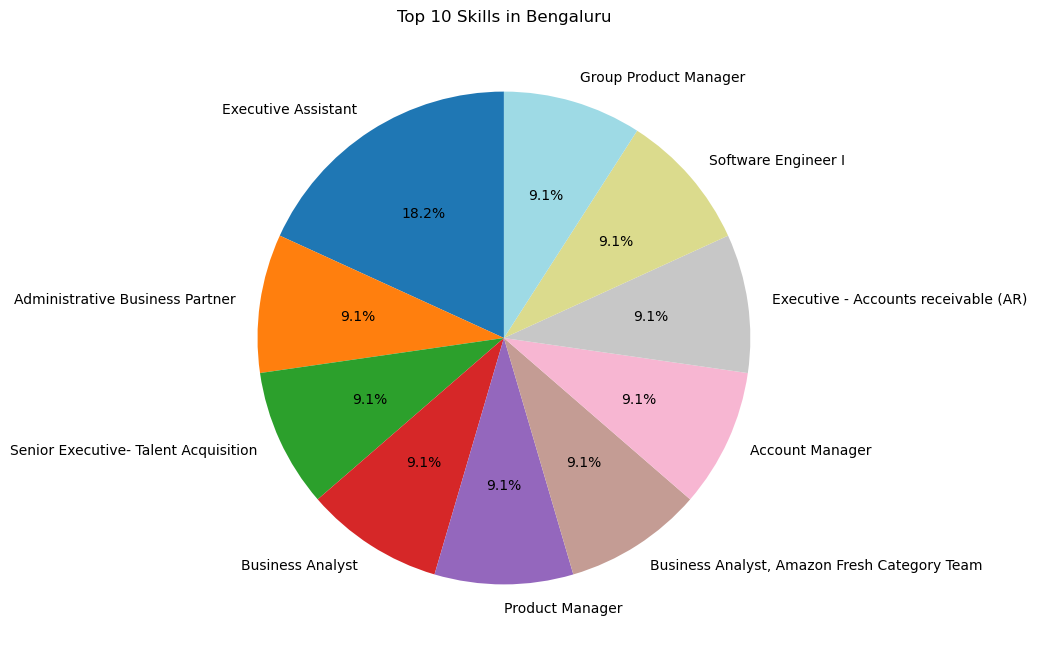

In [103]:
# Pie Chart for Top Skills in a City
city_name = 'Bengaluru'  # Replace with a city of choice
city_data = df[df['City'] == city_name]['Skills'].value_counts().head(10)

# Plot pie chart
city_data.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', startangle=90, cmap='tab20')
plt.title(f'Top 10 Skills in {city_name}')
plt.ylabel('')
plt.show()

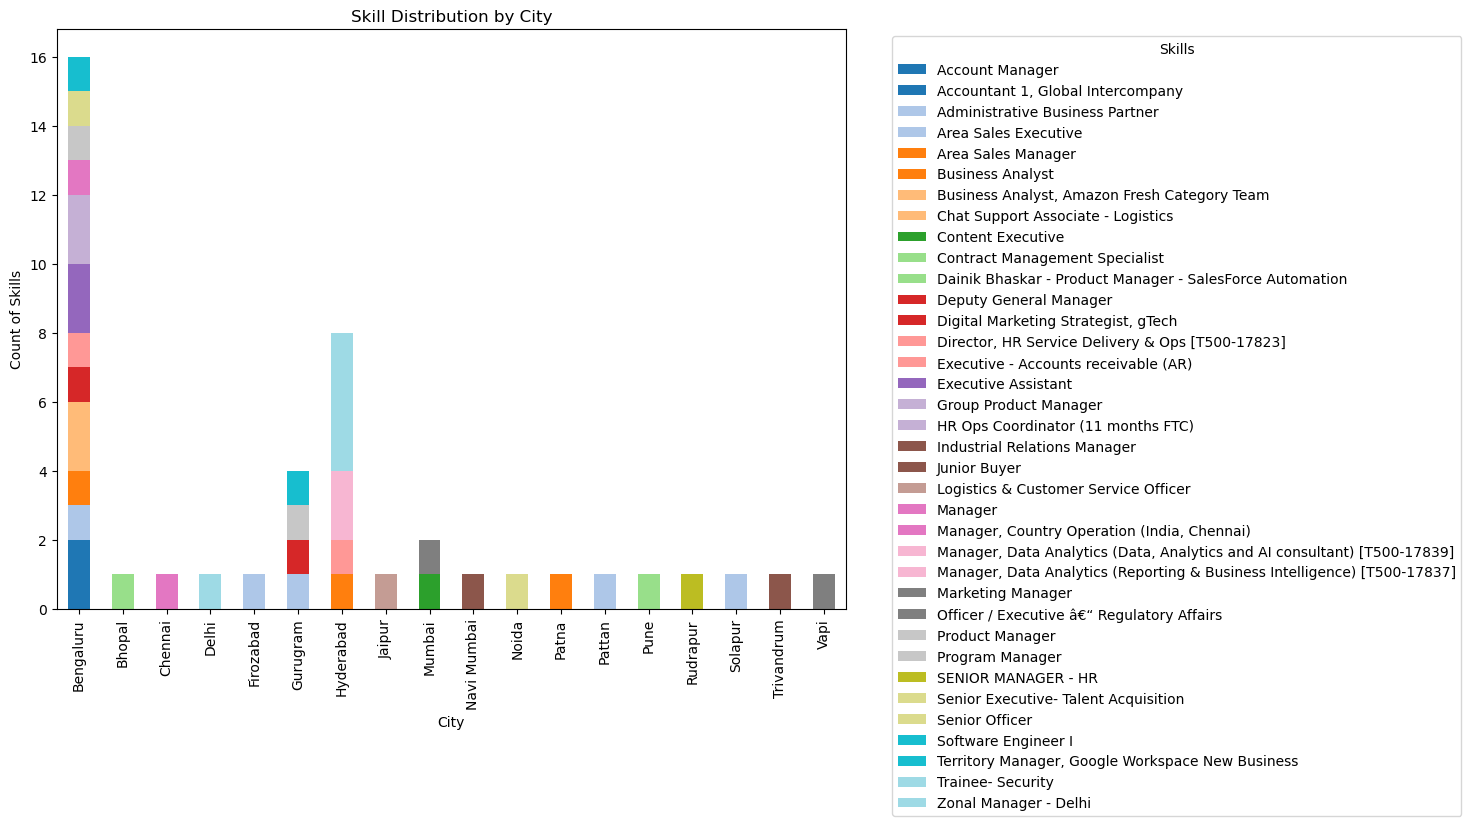

In [105]:
# Pivot data to get skill counts by city
city_skill_counts = df.groupby(['City', 'Skills']).size().unstack(fill_value=0)

# Plot stacked bar chart
city_skill_counts.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='tab20')
plt.title('Skill Distribution by City')
plt.xlabel('City')
plt.ylabel('Count of Skills')
plt.legend(title='Skills', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [111]:
# Get the count of each skill in the dataset
skill_demand = df['Skills'].value_counts()

# Display top N skills
top_skills = skill_demand.head(10)
print(top_skills)

Skills
Trainee- Security                     4
Area Sales Executive                  3
Executive Assistant                   2
Administrative Business Partner       2
Business Analyst                      2
Software Engineer I                   1
Group Product Manager                 1
Content Executive                     1
HR Ops Coordinator (11 months FTC)    1
Deputy General Manager                1
Name: count, dtype: int64
